In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
data_1 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/DeshelvingRate.dir/00046 - DeshelvingRate.csv', delimiter = ',')
data_2 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/ShelvingRate.dir/00193 - ShelvingRate.csv', delimiter = ',')

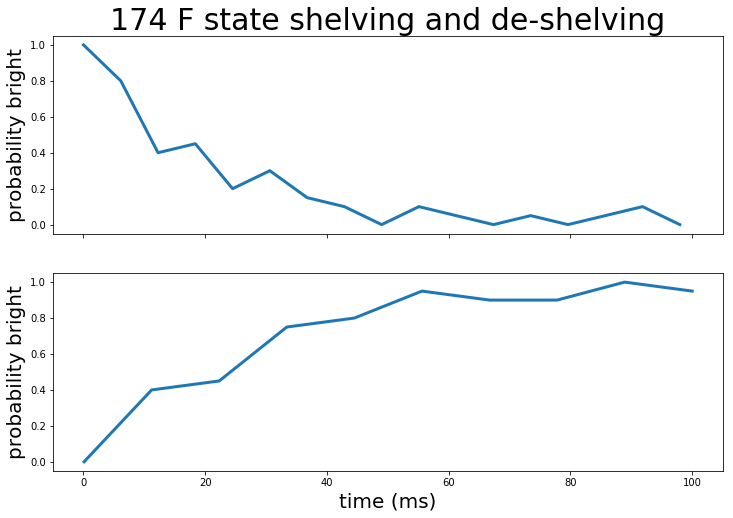

In [30]:
plt.figure(1, figsize=(12,8))
ax1 = plt.subplot(212)
plt.plot(data_1[:,0], data_1[:,1], linewidth=3)
plt.xlabel('time (ms)', fontsize=20)
plt.ylabel('probability bright', fontsize=20)
ax2 = plt.subplot(211, sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.plot(data_2[0::3,0], data_2[0::3,1], linewidth=3)
plt.ylabel('probability bright', fontsize=20)
plt.title('174 F state shelving and de-shelving', fontsize=30)
plt.savefig('/home/qsimexpcontrol/plots/shelving/411_shelving_deshelving.pdf')

In [30]:
data_2 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/ShelvingRate.dir/00310 - ShelvingRate.csv', delimiter = ',')

<IPython.core.display.Javascript object>


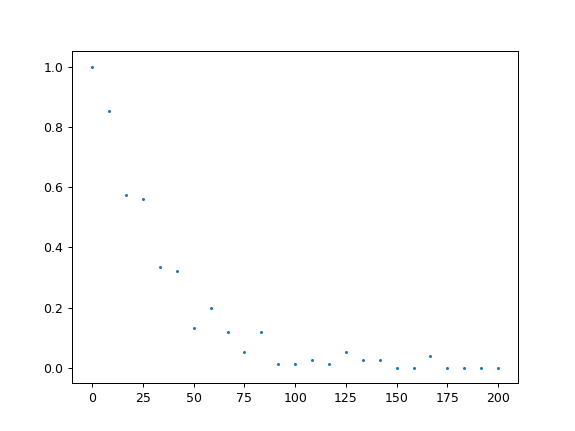

In [31]:
x_data = data_2[0:,0] 
y_data = data_2[0:,1]
plt.scatter(x_data, y_data, s=2)

33.030062347670636


<IPython.core.display.Javascript object>


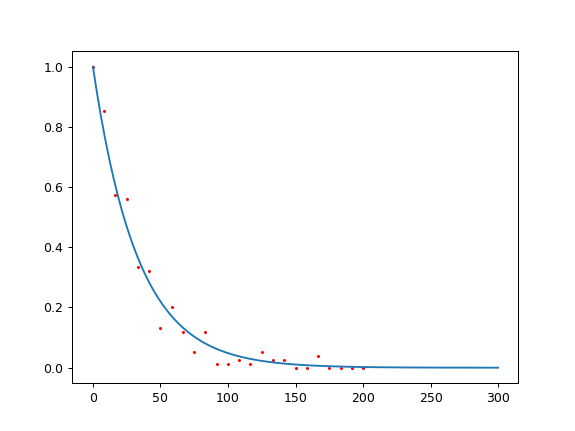

In [32]:
from scipy.optimize import curve_fit
def expfunc(x, b):
   return np.exp(-1*x/b)

x = np.linspace(0, 300, 100)
expfit, pcov1 = curve_fit(expfunc, x_data,y_data, p0=[50])
print expfit[0]
plt.plot(x, np.exp(-1*x/expfit[0]))
plt.scatter(x_data, y_data, s=2, color='red')

In [79]:
bright_data = np.zeros(150)
for item in ['88967', '88969' ,'88971', '88973' , '88975', '88977', '88979' ,
             '88981', '88983' ,'88985', '88987' , '88989', '88991', '88993' ,
             '88995', '88997' , '88999', '89001']:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ item + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 150 - len(y_data)), 'constant', constant_values=(0,0))
    bright_data += y_data

In [81]:
dark_data = np.zeros(150)
for item in ['88968', '88970' ,'88972', '88974' , '88976', '88978', '88980' ,
             '88982', '88984' ,'88986', '88988' , '88990', '88992', '88994' ,
             '88996', '88998' , '89000', '89002']:
    hist_data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Histograms.dir/'+ item + ' - Histogram.csv', delimiter = ',')
    y_data = hist_data[0:,1]
    y_data = np.lib.pad(y_data, (0, 150 - len(y_data)), 'constant', constant_values=(0,0))
    dark_data += y_data

<IPython.core.display.Javascript object>


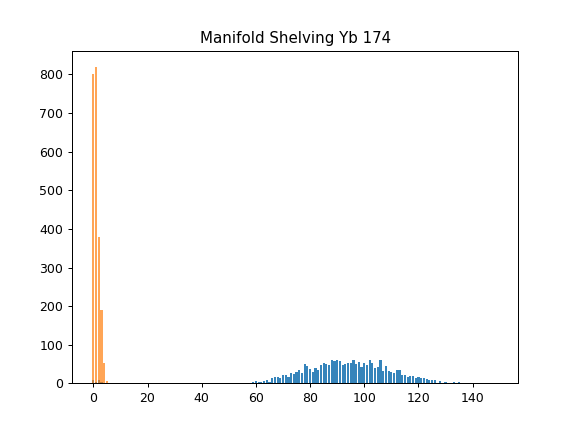

0.9982222222222222
0.988
0.9931111111111111


Text(0.5,1,'Manifold Shelving Yb 174')

In [126]:
threshold = 25
exp = 18*125
x = np.linspace(0,149,150)
plt.bar(x, bright_data, alpha=0.9)
plt.bar(x, dark_data, alpha = 0.7)
test = np.where(dark_data >= threshold)
dark_error = np.sum(dark_data[threshold:])/(18*125.0)
print 1 - dark_error
bright_error = np.sum(bright_data[:threshold])/(18*125.0)
print 1 - bright_error
print 1 - (bright_error + dark_error)/2.0
plt.title('Manifold Shelving Yb 174')
#plt.savefig('/home/qsimexpcontrol/plots/first_shelving.pdf')

<IPython.core.display.Javascript object>


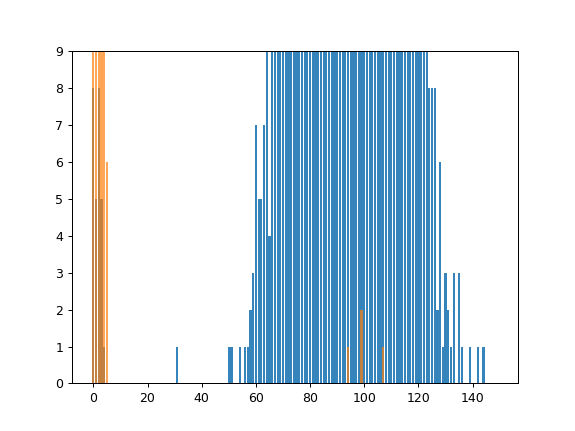

<BarContainer object of 150 artists>

In [123]:
plt.ylim([0,9])
plt.bar(x, bright_data, alpha=0.9)
plt.bar(x, dark_data, alpha = 0.7)